### What is Agglomerative clustering?

The agglomerative clustering is the most common type of ***hierarchical clustering*** used to group objects in clusters based on their similarity. It’s also known as AGNES (Agglomerative Nesting). 

The algorithm ***starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.*** The result is a tree-based representation of the objects, named ***dendrogram.***

### How do we calculate Agglomerative Clustering

Suppose we have a dataset 1,2,3,4,5 with values 8,5,15,18,20. 
#### Steps:
- ***Calculate distance from each point.***

So a matrix of 5x5 wil be created in which we'll calculate the distance from
1,1 = 0 (8-8)
1,2 = 3 (8-5)
1,3 = 7 (8-15)
1,4 = 10 (8-18)
1,5 = 12 (8-20)

- ***So after doing the abol=ve for all data points, we consider all of them as an individual cluster***

1,2,3,4,5

- ***Merge the points based on the distance***

(1,2),3,4,5

- ***Now the distance matrix will change again cause we got out first cluster.***

Now we'll have four points
(1,2),3,4,5

Calculate the proximity matrix again. Where for a cluster of (1,2), it'll choose the maximum value from both.

So now we have a dataset of (1,2),3,4,5 with values 8,15,18,20

(1,2),(1,2) = 0
(1,2),3 = 7 (8-15)
(1,2),4 = 10
(1,2),5 = 12

And so on calculate for all
- ***Now we'll merge the points again.***
4,5 will merge together as it has lowest distance.

(1,2),3,(4,5)
- ***Continue this process untill we get the final cluster.***
(1,2,3,4,5)

### How do we select number of clusters and how do we group it?

To get the clusters or number of clusters, we use a dendogram. Its a tree based representation which represent's the merging process. We use a library to do so.
Suppose we have a graph X,Y
- ***X -> Samples or Index***
- ***Y -> Distances***

A dendogram is represented.
#### No of clusters
We use a threshold line.
n_cluster = 2 (for the above eg, as (1,2,3),(4,5) were 2 clusters were formed) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mall.csv")

In [3]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data["Genre"] = data["Genre"].map({"Female":0,"Male":1})

In [5]:
x = data

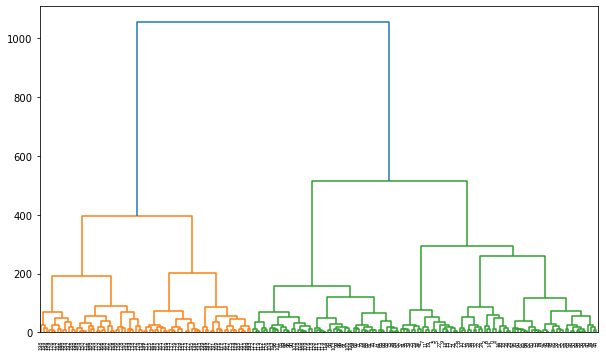

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize = (10,6))
den = shc.dendrogram(shc.linkage(x, method = "ward"))

In [7]:
from sklearn.cluster import AgglomerativeClustering

In [8]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |    

In [9]:
model = AgglomerativeClustering(n_clusters = 6)
model.fit(x)

AgglomerativeClustering(n_clusters=6)

In [10]:
model.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 3, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int64)

In [11]:
X = data [["Annual_Income_(k$)","Spending_Score"]]

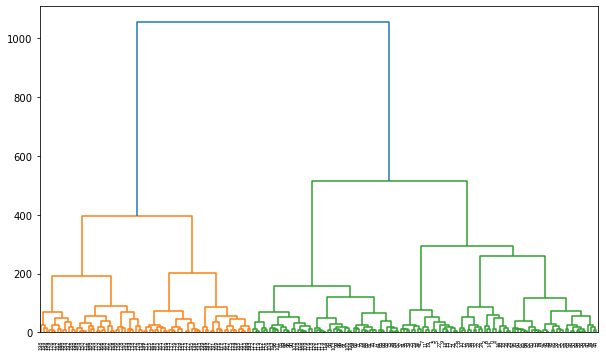

In [12]:
plt.figure(figsize = (10,6))
den = shc.dendrogram(shc.linkage(x, method = "ward"))

In [13]:
model = AgglomerativeClustering(n_clusters = 5)
model.fit(X)

AgglomerativeClustering(n_clusters=5)

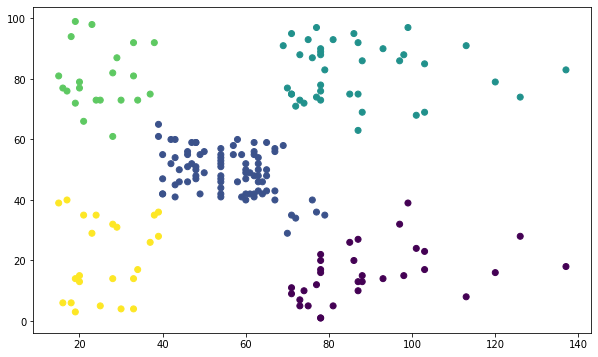

In [14]:
plt.figure(figsize = (10,6))
plt.scatter(data["Annual_Income_(k$)"],data["Spending_Score"], c = model.labels_)